In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
driver = webdriver.Chrome()
# Setting the driver to only get the team pitching stats
driver.get("https://www.mlb.com/stats/team/pitching?sortState=asc")


In [3]:
cont = 0
player_count = 0
temp_head = []
temp_stats = []

sleep(random.randint(1, 15+1))
for i in driver.find_elements(By.TAG_NAME, "tr"):
    if cont <= 0:
        temp_head.append(i.text)
        cont += 1
    else:
        temp_stats.append(i.text)
print(f"Done getting information from the page")


Done getting information from the page


In [4]:
df_head = [item for sublist in temp_head for item in sublist.split('\n')]
df_head.insert(0, "no")
# df_head.insert(2, "POS")
print(df_head)


['no', 'TEAM', 'LEAGUE', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'SHO', 'SV', 'SVO', 'IP', 'H', 'R', 'ER', 'HR', 'HB', 'BB', 'SO', 'WHIP', 'AVG']


In [5]:
team_pitching_stats = []
temp_lst = []

for team in temp_stats:
    temp = team.split("\n")
    cont = 0
    for i in temp:
        # print(f"Cont value {cont}, i value is {i}")
        # print(f"Test FOR\n{i}\n---------------\n")
        if cont == 2:
            # print("Cont == 3")
            clean_stats = i.split(" ")
            for stat in clean_stats:
                temp_lst.append(stat)
                cont = 0
            team_pitching_stats.append(temp_lst)
            temp_lst = []
        else:
            temp_lst.append(i)
            cont += 1

print(team_pitching_stats)


[['1', 'Toronto Blue Jays', 'AL', '67', '54', '3.68', '121', '121', '1', '12', '42', '55', '1079.2', '976', '482', '441', '144', '52', '364', '1134', '1.24', '.239'], ['2', 'Seattle Mariners', 'AL', '64', '55', '3.72', '119', '119', '2', '11', '32', '49', '1067.2', '948', '488', '441', '129', '33', '308', '1086', '1.18', '.235'], ['3', 'Cleveland Guardians', 'AL', '58', '62', '3.76', '120', '120', '1', '13', '35', '59', '1071.0', '985', '485', '448', '120', '39', '376', '963', '1.27', '.243'], ['4', 'Houston Astros', 'AL', '69', '52', '3.78', '121', '121', '2', '6', '37', '53', '1078.2', '966', '504', '453', '146', '56', '394', '1086', '1.26', '.240'], ['5', 'San Diego Padres', 'NL', '57', '63', '3.83', '120', '120', '0', '10', '28', '50', '1065.0', '955', '490', '453', '134', '58', '403', '1056', '1.28', '.240'], ['6', 'Atlanta Braves', 'NL', '77', '42', '3.86', '119', '119', '1', '12', '37', '56', '1055.0', '967', '494', '452', '125', '53', '387', '1094', '1.28', '.242'], ['7', 'Tamp

In [7]:
""" for x in team_pitching_stats:
    if len(x) != 22:
        print(f"{x}")
 """

In [10]:
team_pitching_df = pd.DataFrame(columns=df_head,
                               data=team_pitching_stats)
team_pitching_df.drop(columns=["no"], inplace=True)
team_pitching_df

,TEAM,LEAGUE,W,L,ERA,G,GS,CG,SHO,SV,...,IP,H,R,ER,HR,HB,BB,SO,WHIP,AVG
0,Toronto Blue Jays,AL,67,54,3.68,121,121,1,12,42,...,1079.2,976,482,441,144,52,364,1134,1.24,.239
1,Seattle Mariners,AL,64,55,3.72,119,119,2,11,32,...,1067.2,948,488,441,129,33,308,1086,1.18,.235
2,Cleveland Guardians,AL,58,62,3.76,120,120,1,13,35,...,1071.0,985,485,448,120,39,376,963,1.27,.243
3,Houston Astros,AL,69,52,3.78,121,121,2,6,37,...,1078.2,966,504,453,146,56,394,1086,1.26,.240
4,San Diego Padres,NL,57,63,3.83,120,120,0,10,28,...,1065.0,955,490,453,134,58,403,1056,1.28,.240
5,Atlanta Braves,NL,77,42,3.86,119,119,1,12,37,...,1055.0,967,494,452,125,53,387,1094,1.28,.242
6,Tampa Bay Rays,AL,72,50,3.86,123,123,0,11,32,...,1084.0,953,490,465,129,44,348,1085,1.20,.233
7,San Francisco Giants,NL,64,56,3.91,121,121,2,11,42,...,1075.2,1029,514,467,126,53,306,1037,1.24,.251
8,Minnesota Twins,AL,63,59,3.92,122,122,2,9,28,...,1088.1,976,500,474,144,45,330,1164,1.20,.238
9,Philadelphia Phillies,NL,65,55,3.95,120,120,1,3,34,...,1067.1,976,519,469,137,41,350,1068,1.24,.241


In [11]:
driver.close()


In [13]:
team_pitching_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEAM    30 non-null     object
 1   LEAGUE  30 non-null     object
 2   W       30 non-null     object
 3   L       30 non-null     object
 4   ERA     30 non-null     object
 5   G       30 non-null     object
 6   GS      30 non-null     object
 7   CG      30 non-null     object
 8   SHO     30 non-null     object
 9   SV      30 non-null     object
 10  SVO     30 non-null     object
 11  IP      30 non-null     object
 12  H       30 non-null     object
 13  R       30 non-null     object
 14  ER      30 non-null     object
 15  HR      30 non-null     object
 16  HB      30 non-null     object
 17  BB      30 non-null     object
 18  SO      30 non-null     object
 19  WHIP    30 non-null     object
 20  AVG     30 non-null     object
dtypes: object(21)
memory usage: 5.0+ KB


In [14]:
team_pitching_df = team_pitching_df.astype({
    'LEAGUE': 'category',
    'W':'int', 
    'L':'int', 
    'ERA': 'float', 
    'G':'int', 
    'GS':'int', 
    'CG': 'int', 
    'SHO': 'int', 
    'SV': 'int', 
    'SVO': 'int', 
    'IP': 'float', 
    'H': 'int', 
    'R': 'int', 
    'ER': 'int', 
    'HR': 'int', 
    'HB':'int', 
    'BB':'int', 
    'SO':'int', 
    'WHIP':'float', 
    'AVG':'float'
})
team_pitching_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   TEAM    30 non-null     object  
 1   LEAGUE  30 non-null     category
 2   W       30 non-null     int64   
 3   L       30 non-null     int64   
 4   ERA     30 non-null     float64 
 5   G       30 non-null     int64   
 6   GS      30 non-null     int64   
 7   CG      30 non-null     int64   
 8   SHO     30 non-null     int64   
 9   SV      30 non-null     int64   
 10  SVO     30 non-null     int64   
 11  IP      30 non-null     float64 
 12  H       30 non-null     int64   
 13  R       30 non-null     int64   
 14  ER      30 non-null     int64   
 15  HR      30 non-null     int64   
 16  HB      30 non-null     int64   
 17  BB      30 non-null     int64   
 18  SO      30 non-null     int64   
 19  WHIP    30 non-null     float64 
 20  AVG     30 non-null     float64 
dtypes: category(1), fl

In [15]:
team_pitching_df.to_csv("team_pitching_stats.csv", index=False)

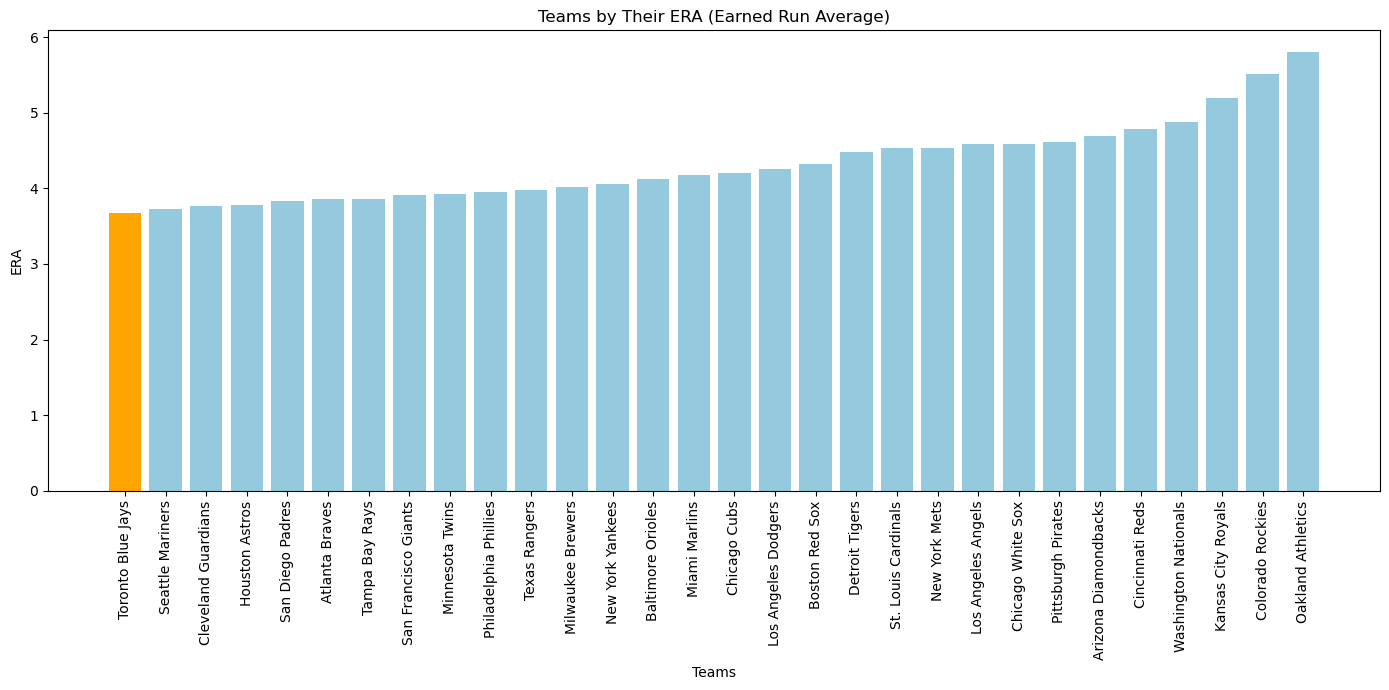

In [16]:
best_team_era_updated = team_pitching_df.loc[team_pitching_df['ERA'].idxmin()]

# Setting the plot size
plt.figure(figsize=(14, 7))

# Bar plot to visualize the ERA of the teams
sns.barplot(x='TEAM', y='ERA', data=team_pitching_df, color='skyblue')

# Highlighting the team with the best ERA (lowest)
plt.bar(team_pitching_df.index[team_pitching_df['TEAM']
        == 'Toronto Blue Jays'], best_team_era_updated['ERA'], color='orange')

# Adding labels and title
plt.xlabel('Teams')
plt.ylabel('ERA')
plt.title('Teams by Their ERA (Earned Run Average)')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()


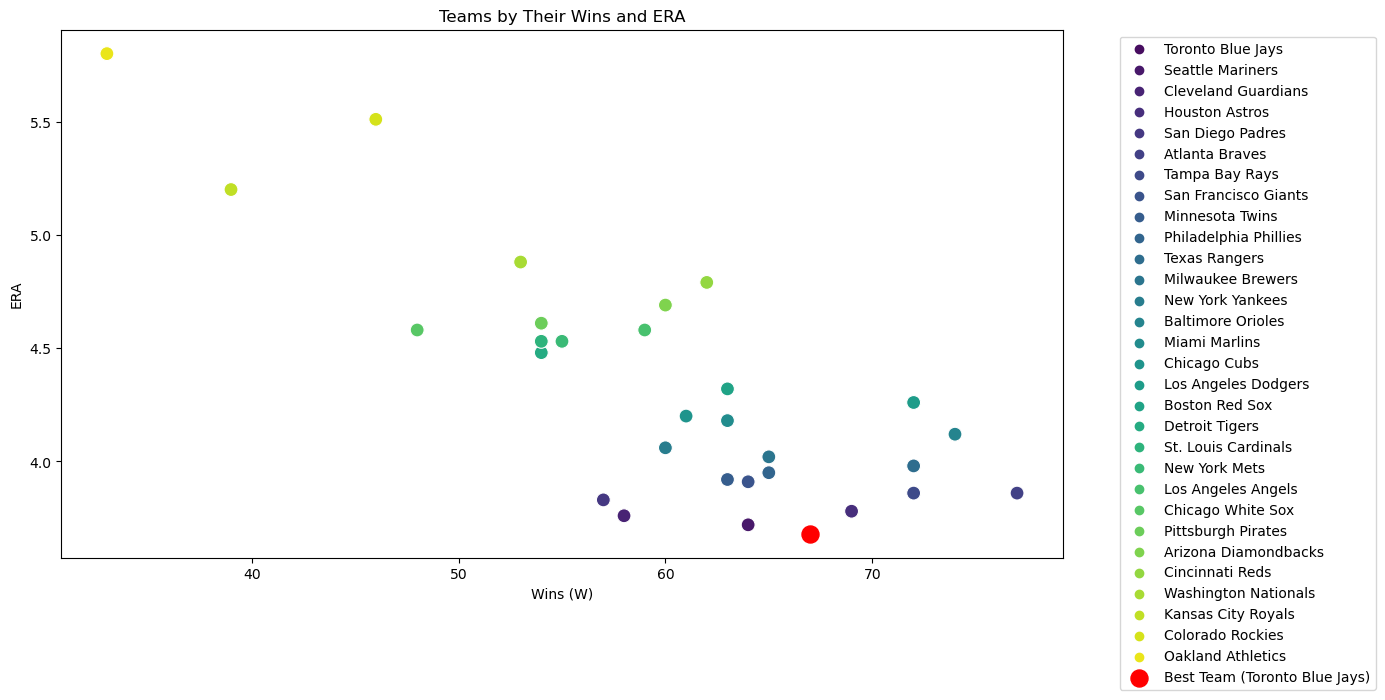

In [18]:
# Setting the plot size
plt.figure(figsize=(14, 7))

# Scatter plot to visualize teams by their Wins and ERA
sns.scatterplot(x='W', y='ERA', data=team_pitching_df,
                hue='TEAM', s=100, palette='viridis')

# Highlighting the team with the best ERA (lowest)
plt.scatter(best_team_era_updated['W'], best_team_era_updated['ERA'],
            color='red', s=150, label='Best Team (Toronto Blue Jays)')

# Adding labels, title, and legend
plt.xlabel('Wins (W)')
plt.ylabel('ERA')
plt.title('Teams by Their Wins and ERA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Displaying the plot
plt.show()
